UCSanDiegoX: DSE200x Python for Data Science

Week 7 - Introduction to Machine Learning

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import python_utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

k-means clustering using scikit-learn

minute_weather.csv available on https://drive.google.com/open?id=0B8iiZ7pSaSFZb3ItQ1l4LWRMTjg

In [2]:
data = pd.read_csv('./weather/minute_weather.csv')

In [3]:
print(data.shape)
print(data.loc[0])

(1587257, 13)
rowID                                   0
hpwren_timestamp      2011-09-10 00:00:49
air_pressure                        912.3
air_temp                            64.76
avg_wind_direction                     97
avg_wind_speed                        1.2
max_wind_direction                    106
max_wind_speed                        1.6
min_wind_direction                     85
min_wind_speed                          1
rain_accumulation                     NaN
rain_duration                         NaN
relative_humidity                    60.5
Name: 0, dtype: object


In [4]:
# Data Sampling - reduce the data, getting just one in ten
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [5]:
# Statistics
print(sampled_df.describe().transpose())

                       count           mean            std     min       25%  \
rowID               158726.0  793625.000000  458203.937509    0.00  396812.5   
air_pressure        158726.0     916.830161       3.051717  905.00     914.8   
air_temp            158726.0      61.851589      11.833569   31.64      52.7   
avg_wind_direction  158680.0     162.156100      95.278201    0.00      62.0   
avg_wind_speed      158680.0       2.775215       2.057624    0.00       1.3   
max_wind_direction  158680.0     163.462144      92.452139    0.00      68.0   
max_wind_speed      158680.0       3.400558       2.418802    0.10       1.6   
min_wind_direction  158680.0     166.774017      97.441109    0.00      76.0   
min_wind_speed      158680.0       2.134664       1.742113    0.00       0.8   
rain_accumulation   158725.0       0.000318       0.011236    0.00       0.0   
rain_duration       158725.0       0.409627       8.665523    0.00       0.0   
relative_humidity   158726.0      47.609

In [6]:
# rain_duration and rain_accumulation are mostly zero, drop them
print(sampled_df[sampled_df['rain_accumulation'] == 0].shape)
print(sampled_df[sampled_df['rain_duration'] == 0].shape)

del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

# drop rows w/ missing values
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

print(rows_before - rows_after)
print(sampled_df.columns)

(157812, 13)
(157237, 13)
46
Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')


In [7]:
# Select Features of Interest for Clustering
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']
select_df = sampled_df[features]
print(select_df.columns)
print(select_df.loc[0])

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')
air_pressure          912.30
air_temp               64.76
avg_wind_direction     97.00
avg_wind_speed          1.20
max_wind_direction    106.00
max_wind_speed          1.60
relative_humidity      60.50
Name: 0, dtype: float64


In [8]:
# Scale the Features using StandardScaler 
X = StandardScaler().fit_transform(select_df)

# Use k-Means Clustering 
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0) KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [11]:
# seven dimensional centers of 12 clusters
centers = model.cluster_centers_
centers

array([[-0.84040248, -1.19780108,  0.37501674,  0.35296087,  0.4735058 ,
         0.34090968,  1.36248437],
       [-0.69388656,  0.5472401 ,  0.17809118, -0.58374049,  0.34740474,
        -0.59712119, -0.11697642],
       [-1.1790661 , -0.87704115,  0.44667883,  1.97548883,  0.53865824,
         1.93672513,  0.9152889 ],
       [ 1.36808691, -0.08191637, -1.20697381, -0.04755782, -1.07593093,
        -0.02714995, -0.97772106],
       [-0.16251973,  0.8634201 , -1.31112047, -0.58983119, -1.16681466,
        -0.60514925, -0.6420129 ],
       [ 0.25311518, -0.99411795,  0.65996438, -0.5475339 ,  0.85146201,
        -0.53010191,  1.1578161 ],
       [ 0.13158165,  0.84397885,  1.41075195, -0.63846937,  1.67476641,
        -0.58920289, -0.71407327],
       [ 1.18996001, -0.25528534, -1.15501849,  2.12544268, -1.05343738,
         2.24257986, -1.13426243],
       [ 0.05980511, -0.78760536, -1.19685216, -0.57096021, -1.04281223,
        -0.58546363,  0.87712982],
       [ 0.73314462,  0.4325

### Plotting

In [17]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

# Function that creates Parallel Plots
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

P = pd_centers(features, centers)
print(P.loc[0:1])

   air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0     -0.840402 -1.197801            0.375017        0.352961   
1     -0.693887  0.547240            0.178091       -0.583740   

   max_wind_direction  max_wind_speed  relative_humidity  prediction  
0            0.473506        0.340910           1.362484           0  
1            0.347405       -0.597121          -0.116976           1  


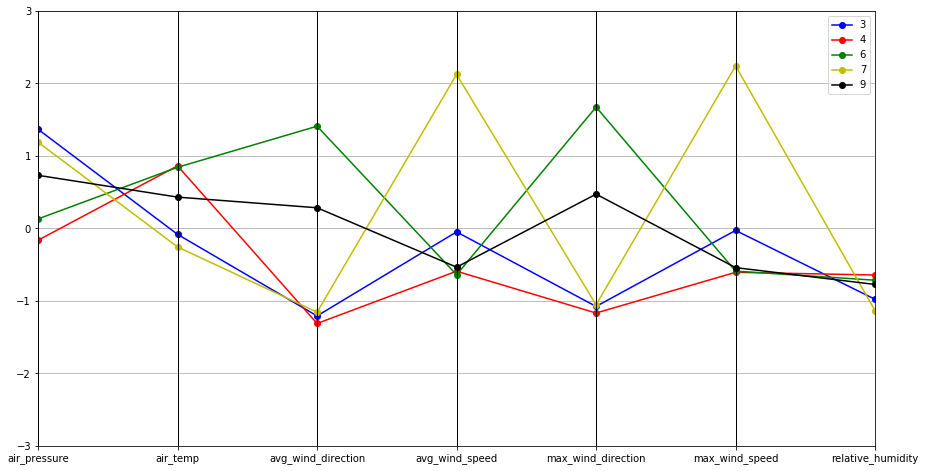

In [19]:
# Dry Days
parallel_plot(P[P['relative_humidity'] < -0.5])

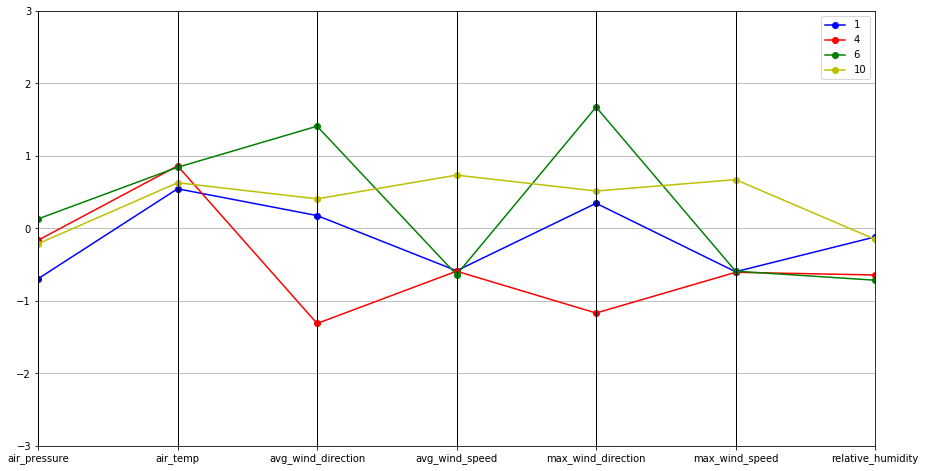

In [20]:
# Warm Days
parallel_plot(P[P['air_temp'] > 0.5])

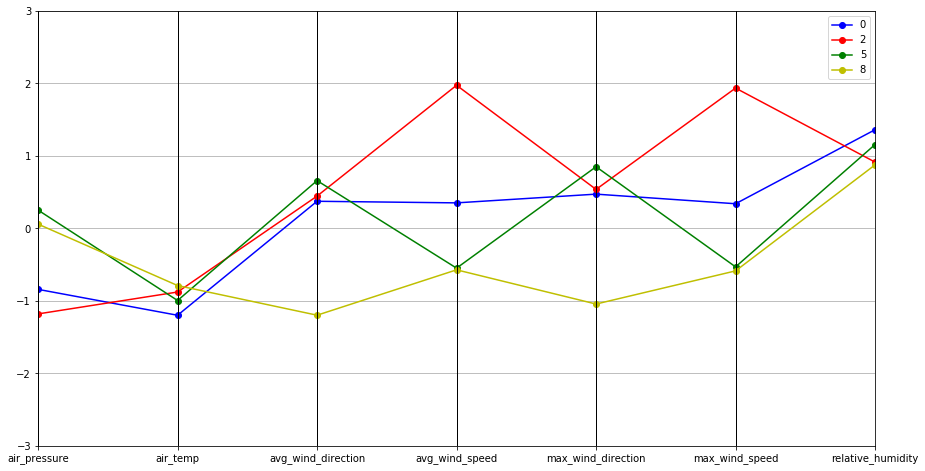

In [21]:
# Cool Days
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])